In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv(r"https://raw.githubusercontent.com/Madhavan1232/Elective_ML_2/main/PortalQuestions/Data/ML374_S6_Practice_BikeSales_Data.csv")


In [22]:
# Data Preparation
# Select features and target
X = df[['Unit_Cost']]
y = df['Revenue']

# Handle missing values by dropping them
data = pd.concat([X, y], axis=1).dropna()
X = data[['Unit_Cost']]
y = data['Revenue']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Create a DataFrame with scaled values
scaled_df = pd.DataFrame({'Unit_Cost': X_scaled.flatten(), 'Revenue': y_scaled})

# Split the data into training and testing sets
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=200
)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_pr, y_train_pr)

# Make predictions
y_pred_pr = model.predict(X_test_pr)

print("Model Training Complete!")
print(f"Model Coefficient: {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

Model Training Complete!
Model Coefficient: 0.6402
Model Intercept: 0.0099


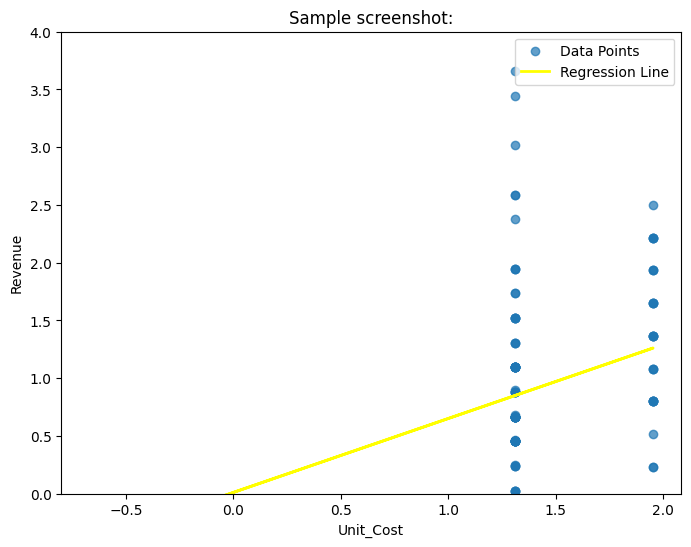

In [23]:
# Plot 1: Regression Line and Data Points
# Scatter plot of standardized Unit_Cost vs. Revenue with regression line

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['Unit_Cost'], scaled_df['Revenue'], alpha=0.7, label='Data Points')
plt.plot(X_test_pr, y_pred_pr, color='yellow', linewidth=2, label='Regression Line')
plt.xlabel('Unit_Cost')
plt.ylabel('Revenue')
plt.ylim(0, 4)
plt.title('Sample screenshot:')
plt.legend()
plt.show()

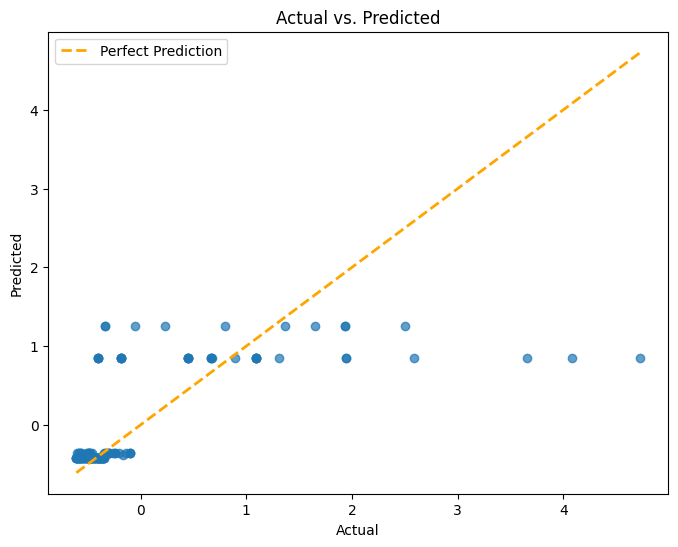

In [24]:
# Plot 2: Checking Linearity Assumption - Actual vs. Predicted
# Scatter plot of actual vs predicted values with diagonal reference line

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pr, y_pred_pr, alpha=0.7)
plt.plot([y_test_pr.min(), y_test_pr.max()], [y_test_pr.min(), y_test_pr.max()], 
         color='orange', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

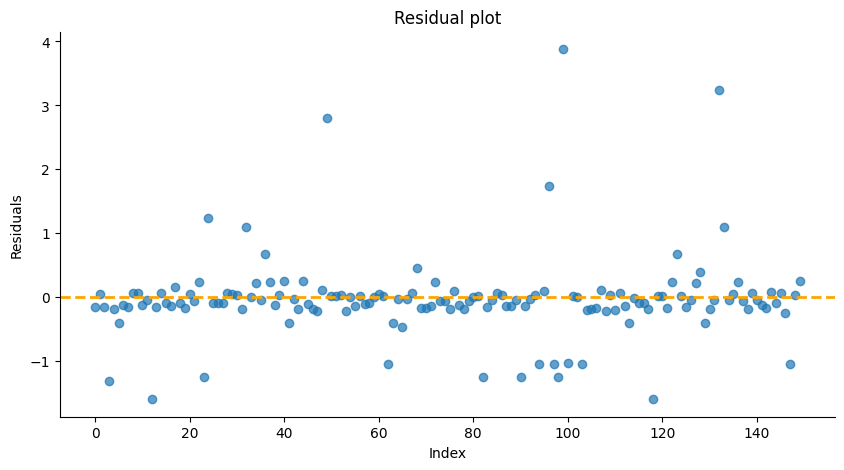

In [25]:
# Plot 3: Checking Homoscedasticity Assumption - Residual Plot
# Calculate residuals
residuals = y_test_pr - y_pred_pr

plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual plot')

# Remove top and right spines for cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

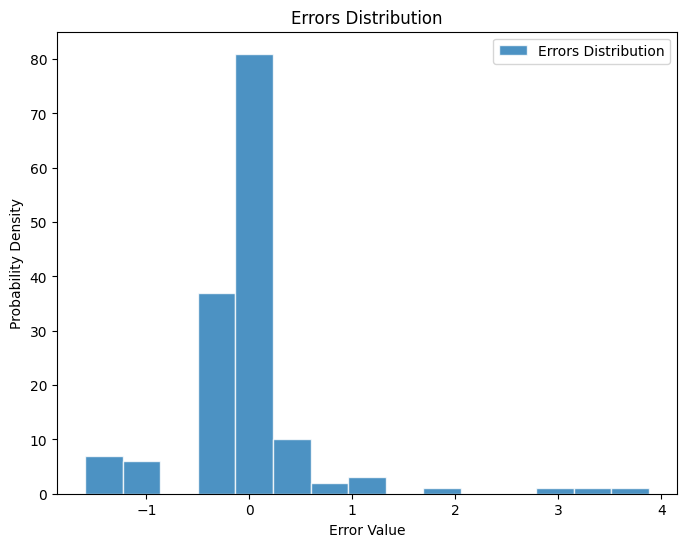

In [26]:
# Plot 4: Errors Distribution - Histogram of Residuals
# Displays a histogram to assess error normality

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=15, edgecolor='white', alpha=0.8, label='Errors Distribution')
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.show()